In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from statsmodels.formula.api import logit
from statsmodels.api import Logit
from sklearn.preprocessing import LabelEncoder

### Configuration
Configure the notebooks to make a better look and feel which assists to do the analysis in easy ways.

In [96]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [97]:
df = pd.read_excel("data2.xlsx", index_col='Serial_no')
df = df.loc[:, df.columns != 'Q_1']
df = df.drop(columns=['Q_14', 'Q_15'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,27,8,150000,3.0,0,1,1,1,1,1,2,2,2,2,7,6,2,1,2,2,2,2,1,1,2,3,2,1,1,3,2,1,2,2,2,2,2,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,5
2,2,26,10,115000,0.0,0,1,1,3,3,1,2,2,1,3,8,7,2,2,2,2,1,1,2,1,1,3,2,1,1,3,1,2,2,2,2,2,1,1,1,1,1,3,2,2,1,1,1,2,2,2,5,5,4
3,2,26,6,120000,3.0,2,1,1,3,3,2,2,2,2,2,4,4,2,1,2,2,1,1,1,2,2,3,2,2,3,3,1,2,2,2,2,2,1,1,1,1,2,2,2,1,2,1,1,1,1,1,5,5,3


In [98]:
categorical_d = ['Q_2', 'Q_7', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_16', 'Q_17', 'Q_20', 'Q_21', 'Q_22', 'Q_23', 'Q_24', 'Q_25', 'Q_26', 'Q_27', 'Q_28', 'Q_29', 'Q_30', 'Q_31', 'Q_32', 'Q_33', 'Q_34', 'Q_35_i', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_v', 'Q_35_vi', 'Q_36', 'Q_37_i', 'Q_37_ii', 'Q_37_iii', 'Q_37_iv', 'Q_37_v', 'Q_37_vi', 'Q_37_vii', 'Q_37_viii', 'Q_37_ix', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv']

numerical_d = ['Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']

df[categorical_d].head(2)

,Q_2,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,1,2,2,2,2,2,1,2,2,2,2,1,1,2,3,2,1,1,3,2,1,2,2,2,2,2,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,5
2,2,0,1,3,3,1,2,2,1,3,2,2,2,2,1,1,2,1,1,3,2,1,1,3,1,2,2,2,2,2,1,1,1,1,1,3,2,2,1,1,1,2,2,2,5,5,4


In [99]:
for i in categorical_d:
    print(pd.crosstab(index=df[i], columns=df['Drop_out']))
    print("------------------")

Drop_out   0   1
Q_2             
1         37  98
2         29  46
------------------
Drop_out   0    1
Q_7              
0          0    3
2         66  141
------------------
Drop_out   0   1
Q_8             
1         24  93
2         17  44
3         25   7
------------------
Drop_out   0   1
Q_9             
1          5  41
2          9  18
3         52  85
------------------
Drop_out   0   1
Q_10            
1          2  16
2         11  73
3         53  55
------------------
Drop_out   0    1
Q_11             
1         36  117
2         30   27
------------------
Drop_out   0   1
Q_12            
1          0  53
2          0  91
3         66   0
------------------
Drop_out   0   1
Q_13            
1          4  37
2         32  79
3         30  28
------------------
Drop_out   0    1
Q_16             
1         39   29
2         27  113
22         0    2
------------------
Drop_out   0   1
Q_17            
1          1  31
2         20  65
3         45  48
-----------------

In [100]:
# fig = plt.figure(figsize=(32, 90))
# k = 1
# for i in categorical_d:
#     plt.subplot(13, 4, k)
#     crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
#     sns.barplot(crs)
#     k += 1
#
# plt.show()

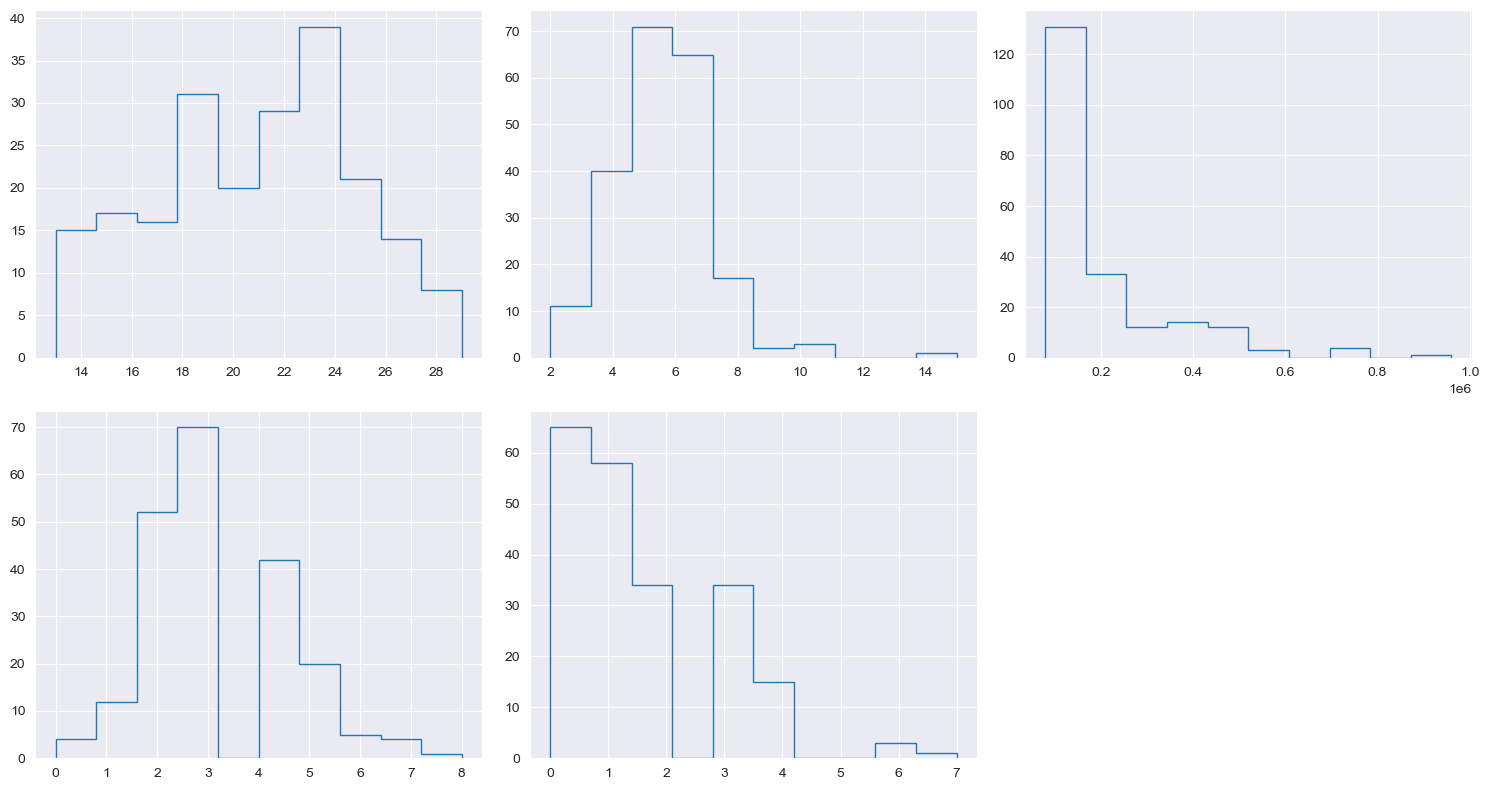

In [101]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in numerical_d:
    plt.subplot(2, 3, k)
    plt.hist(df[i], label=df[i], histtype='step')
    k += 1

plt.tight_layout()
plt.show()

In [102]:
sig_factors = []

In [103]:
for i in numerical_d:
    p_val = stats.kstest(df[i], 'norm').pvalue
    if p_val<0.05:
        sig_factors.append(i)
for i in categorical_d:
    crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    if p<0.05:
        sig_factors.append(i)

In [104]:
print("Significant variables")
print(sig_factors)

Significant variables
['Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_16', 'Q_17', 'Q_21', 'Q_23', 'Q_24', 'Q_27', 'Q_29', 'Q_31', 'Q_34', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_vi', 'Q_36', 'Q_37_iii', 'Q_37_iv', 'Q_37_vi', 'Q_37_vii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv']


In [105]:
sig_factors.append('Drop_out')
data = df[sig_factors]
data

,Q_3,Q_4,Q_5,Q_18,Q_19,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_21,Q_23,Q_24,Q_27,Q_29,Q_31,Q_34,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_vi,Q_36,Q_37_iii,Q_37_iv,Q_37_vi,Q_37_vii,Q_37_xiii,Q_37_xiv,Q_37_xv,Drop_out
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,150000,7,6,1,1,1,1,2,2,2,2,1,2,2,1,3,1,2,2,2,2,2,1,1,5,1,1,1,1,5,1
2,26,10,115000,8,7,1,3,3,1,2,2,1,3,2,2,1,1,3,1,1,2,2,2,1,1,1,3,2,1,5,5,4,1
3,26,6,120000,4,4,1,3,3,2,2,2,2,2,1,2,1,2,3,2,1,2,2,2,1,1,2,2,1,2,5,5,3,1
4,15,7,150000,3,2,2,3,3,2,2,3,2,1,1,1,1,2,3,2,1,2,2,2,1,1,1,5,1,5,5,5,1,1
5,20,5,90000,3,2,1,3,3,2,2,2,2,3,1,1,1,2,3,2,1,2,2,2,1,1,1,1,1,1,5,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,21,5,200000,3,0,3,3,3,1,3,3,1,3,2,1,2,1,3,2,1,2,2,2,1,1,1,1,5,1,5,5,1,0
340,21,3,200000,1,0,3,3,3,2,3,3,1,3,2,1,2,2,3,2,1,2,2,2,1,1,1,1,5,1,5,5,1,0
341,21,4,210000,2,0,3,3,3,1,3,3,1,3,2,1,2,2,3,2,1,2,2,2,1,1,1,1,5,1,5,5,1,0


In [106]:
data['Drop_out'].value_counts()

1    144
0     66
Name: Drop_out, dtype: int64

In [107]:
fs = "Drop_out ~ "
for l in sig_factors[:-1]:
    fs = fs + ' + ' + l
print(fs)

Drop_out ~  + Q_3 + Q_4 + Q_5 + Q_18 + Q_19 + Q_8 + Q_9 + Q_10 + Q_11 + Q_12 + Q_13 + Q_16 + Q_17 + Q_21 + Q_23 + Q_24 + Q_27 + Q_29 + Q_31 + Q_34 + Q_35_ii + Q_35_iii + Q_35_iv + Q_35_vi + Q_36 + Q_37_iii + Q_37_iv + Q_37_vi + Q_37_vii + Q_37_xiii + Q_37_xiv + Q_37_xv


In [108]:
formula_string = "Drop_out ~ Q_3 + Q_4  + Q_18 + Q_19 + Q_8 + Q_9 + Q_10 + Q_11 + Q_12 + Q_13 + Q_16 + Q_17 + Q_21 + Q_23 + Q_24 + Q_27 + Q_29 + Q_31 + Q_34 + Q_35_ii + Q_35_iii + Q_35_iv + Q_35_vi + Q_36 + Q_37_iii + Q_37_iv + Q_37_vi + Q_37_vii + Q_37_xiii + Q_37_xiv + Q_37_xv"
model = logit(formula=formula_string, data=df).fit()

         Current function value: 0.000066
         Iterations: 35


In [109]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  1.000     
Dependent Variable:    Drop_out          AIC:               64.0277   
Date:                  2022-12-26 10:05  BIC:               171.1351  
No. Observations:      210               Log-Likelihood:    -0.013828 
Df Model:              31                LL-Null:           -130.72   
Df Residuals:          178               LLR p-value:       2.7940e-38
Converged:             0.0000            Scale:             1.0000    
No. Iterations:        35.0000                                        
----------------------------------------------------------------------
           Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------------------------------------------
Intercept  25.9723 490000.1732  0.0001 1.0000 -960356.7196 960408.6642
Q_3        -0.1029   2624.7703 -0.0000 1.0000   -5144.5581   5144.3522
Q_4        -1.6815  12973.1001 -0.0001 0.9999  -25428.4905  25425.1276
Q_18        0.9375  16207.9965  0.0001 1.0000  -31766.1520  31768.0270
Q_19        1.7957  14134.2656  0.0001 0.9999  -27700.8558  27704.4473
Q_8        -0.8256   9522.1078 -0.0001 0.9999  -18663.8140  18662.1627
Q_9        -1.3649  24797.9739 -0.0001 1.0000  -48604.5006  48601.7708
Q_10        9.0299  61668.0294  0.0001 0.9999 -120858.0868 120876.1465
Q_11        0.9285  61873.8325  0.0000 1.0000 -121269.5549 121271.4118
Q_12      -53.4309  81705.6925 -0.0007 0.9995 -160193.6456 160086.7837
Q_13       -1.8218  10636.7709 -0.0002 0.9999  -20849.5097  20845.8661
Q_16       -1.1344   4557.6685 -0.0002 0.9998   -8934.0006   8931.7318
Q_17       -0.8587  19052.9077 -0.0000 1.0000  -37343.8716  37342.1543
Q_21        4.8676  65725.8827  0.0001 0.9999 -128815.4953 128825.2306
Q_23        6.7732  49163.0699  0.0001 0.9999  -96351.0732  96364.6195
Q_24        2.7642  44625.6981  0.0001 1.0000  -87461.9969  87467.5252
Q_27        2.9556  51001.6019  0.0001 1.0000  -99958.3474  99964.2585
Q_29       -3.5941  43560.2885 -0.0001 0.9999  -85380.1908  85373.0025
Q_31        0.6050  53618.9453  0.0000 1.0000 -105090.5966 105091.8067
Q_34       -2.2408  25995.8709 -0.0001 0.9999  -50953.2115  50948.7299
Q_35_ii     6.3587  67964.1707  0.0001 0.9999 -133200.9681 133213.6855
Q_35_iii    7.7556 143606.3529  0.0001 1.0000 -281455.5242 281471.0353
Q_35_iv    15.8763 110986.8327  0.0001 0.9999 -217514.3185 217546.0711
Q_35_vi    -0.5145  42593.2263 -0.0000 1.0000  -83481.7040  83480.6750
Q_36       -3.9183  54831.0702 -0.0001 0.9999 -107470.8410 107463.0045
Q_37_iii   -0.1584  12769.8005 -0.0000 1.0000  -25028.5075  25028.1907
Q_37_iv     4.3717  29330.5098  0.0001 0.9999  -57482.3711  57491.1146
Q_37_vi     2.2839  24043.4845  0.0001 0.9999  -47122.0798  47126.6476
Q_37_vii    4.2266  17319.9932  0.0002 0.9998  -33942.3363  33950.7896
Q_37_xiii   0.9293  14147.3933  0.0001 0.9999  -27727.4521  27729.3106
Q_37_xiv    1.7210  11189.4375  0.0002 0.9999  -21929.1736  21932.6156
Q_37_xv     1.7691  11174.8127  0.0002 0.9999  -21900.4614  21903.9996
======================================================================

"""

In [110]:
# X = df.drop('Drop_out', axis=1)
# y = df['Drop_out']

In [111]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [112]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)